# 1. Objective

Reproduce the R for marketing workshop from [here](https://bookdown.org/content/1340/data.html)

# 2. Imports

In [35]:
library(tidyverse)
library(ggpubr)

Loading required package: magrittr

Attaching package: ‘magrittr’

The following object is masked from ‘package:purrr’:

    set_names

The following object is masked from ‘package:tidyr’:

    extract



# 3. Data

In [17]:
download.file('https://s3.amazonaws.com/tomslee-airbnb-data-2/paris.zip',
              '~/ml-projects/regression-tutorial/paris-listings.zip')

## 3.1. Inspect one file

In [40]:
paris_listings_df = read_csv('paris-listings/tomslee_airbnb_paris_1478_2017-07-25.csv')

Parsed with column specification:
cols(
  .default = col_double(),
  room_type = col_character(),
  country = col_logical(),
  city = col_character(),
  borough = col_logical(),
  neighborhood = col_character(),
  bathrooms = col_logical(),
  minstay = col_logical(),
  name = col_character(),
  property_type = col_character(),
  last_modified = col_datetime(format = ""),
  location = col_character()
)
See spec(...) for full column specifications.


In [20]:
nrow(paris_listings_df)

[1] 70158

In [21]:
names(paris_listings_df)

[1] "room_id"              "survey_id"            "host_id"             
 [4] "room_type"            "country"              "city"                
 [7] "borough"              "neighborhood"         "reviews"             
[10] "overall_satisfaction" "accommodates"         "bedrooms"            
[13] "bathrooms"            "price"                "minstay"             
[16] "name"                 "property_type"        "last_modified"       
[19] "latitude"             "longitude"            "location"

In [22]:
head(paris_listings_df)

room_id,survey_id,host_id,room_type,country,city,borough,neighborhood,reviews,overall_satisfaction,⋯,bedrooms,bathrooms,price,minstay,name,property_type,last_modified,latitude,longitude,location
<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<chr>,<lgl>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<lgl>,<dbl>,<lgl>,<chr>,<chr>,<dttm>,<dbl>,<dbl>,<chr>
10047973,1478,48528719,Shared room,NA,Paris,NA,Gare,1,0.0,⋯,1,NA,108,NA,놀러와 파리 민박-도미토리룸(3~4인실),Apartment,2017-07-30 15:04:34,48.82088,2.368195,0101000020E6100000E0675C3810F202402009FB7612694840
2864617,1478,4531179,Shared room,NA,Paris,NA,Villette,32,4.0,⋯,1,NA,59,NA,A Cheap flat & nice roomates ;-),Apartment,2017-07-30 15:04:27,48.88905,2.375192,0101000020E610000044C4CDA96400034050C58D5BCC714840
5862381,1478,30438981,Shared room,NA,Paris,NA,Saint-Georges,0,0.0,⋯,1,NA,121,NA,PIGALLE,Apartment,2017-07-30 15:04:14,48.88150,2.338549,0101000020E61000007FBF982D59B5024087A5811FD5704840
17197886,1478,115781027,Shared room,NA,Paris,NA,Necker,0,0.0,⋯,1,NA,93,NA,Salon dans colocation,Apartment,2017-07-30 15:04:10,48.83845,2.315149,0101000020E6100000D4EFC2D66C85024065AA6054526B4840
16103729,1478,77134343,Shared room,NA,Paris,NA,Villette,4,4.5,⋯,1,NA,100,NA,Modern Apartment in Paris ❤️ !,Apartment,2017-07-30 15:04:08,48.88986,2.375848,0101000020E6100000D522A298BC010340317E1AF7E6714840
7027668,1478,36842314,Shared room,NA,Paris,NA,Notre-Dame-des-Champs,29,3.5,⋯,1,NA,91,NA,Salon chambre a Montparnasse,Apartment,2017-07-30 15:04:08,48.84164,2.331160,0101000020E610000067F2CD3637A60240128942CBBA6B4840


In [32]:
paris_listings_df %>% 
    group_by(neighborhood) %>% 
    summarize(mean_price = mean(price)) %>%
    arrange(desc(mean_price)) %>% 
    head(10) %>%
    pull(neighborhood) -> 
    most_expensive_neighborhoods

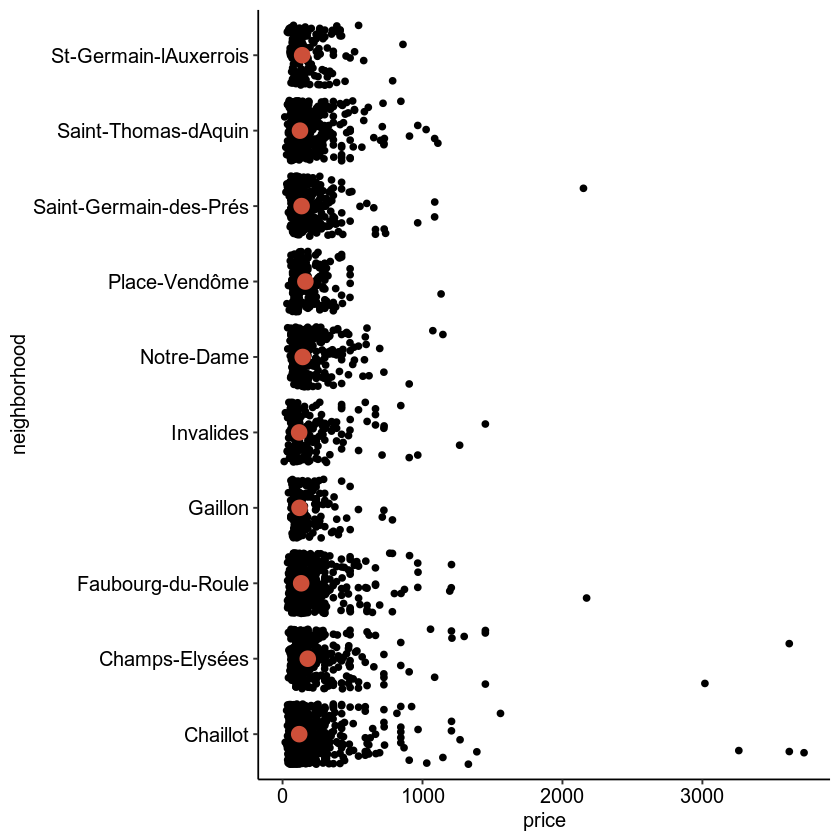

In [36]:
ggplot(filter(paris_listings_df, neighborhood %in% most_expensive_neighborhoods), 
       aes(x = neighborhood, y = price)) +
    geom_jitter() +
    stat_summary(fun.y = median, colour = "tomato3", size = 4, geom = "point") +
    coord_flip() +
    theme_pubr()

## 3.2. Merge all the csv's in the directory

In [59]:
aggregated_paris_listings_df = data.frame()

for (csv_file in list.files('paris-listings')) {
    
    listing_df = read_csv(paste0('~/ml-projects/regression-tutorial/paris-listings/',csv_file))
    
    aggregated_paris_listings_df = bind_rows(aggregated_paris_listings_df, listing_df)

}

Parsed with column specification:
cols(
  room_id = col_double(),
  host_id = col_double(),
  room_type = col_character(),
  borough = col_logical(),
  neighborhood = col_character(),
  reviews = col_double(),
  overall_satisfaction = col_double(),
  accommodates = col_double(),
  bedrooms = col_double(),
  price = col_double(),
  minstay = col_double(),
  latitude = col_double(),
  longitude = col_double(),
  last_modified = col_datetime(format = "")
)
Parsed with column specification:
cols(
  room_id = col_double(),
  host_id = col_double(),
  room_type = col_character(),
  borough = col_logical(),
  neighborhood = col_character(),
  reviews = col_double(),
  overall_satisfaction = col_double(),
  accommodates = col_double(),
  bedrooms = col_double(),
  price = col_double(),
  minstay = col_double(),
  latitude = col_double(),
  longitude = col_double(),
  last_modified = col_datetime(format = "")
)
Parsed with column specification:
cols(
  room_id = col_double(),
  host_id = col_do

In [60]:
nrow(aggregated_paris_listings_df)

[1] 837830

# 4. Exploratory Analysis 

In [61]:
summary(aggregated_paris_listings_df)

    room_id            host_id           room_type         borough       
 Min.   :    2525   Min.   :     1415   Length:837830      Mode:logical  
 1st Qu.: 2642991   1st Qu.:  5519900   Class :character   NA's:837830   
 Median : 6633710   Median : 14118360   Mode  :character                 
 Mean   : 7483464   Mean   : 24040348                                    
 3rd Qu.:12297745   3rd Qu.: 33546017                                    
 Max.   :20144084   Max.   :143204619                                    
                    NA's   :289                                          
 neighborhood          reviews       overall_satisfaction  accommodates   
 Length:837830      Min.   :  0.00   Min.   :0.00         Min.   : 0.000  
 Class :character   1st Qu.:  0.00   1st Qu.:0.00         1st Qu.: 2.000  
 Mode  :character   Median :  3.00   Median :4.50         Median : 3.000  
                    Mean   : 12.64   Mean   :3.21         Mean   : 3.084  
                    3rd Qu.: 13.0

In [62]:
aggregated_paris_listings_df %>%
    mutate(room_id = factor(room_id),
           host_id = factor(host_id)) %>%
    select(-country, -survey_id, -bathrooms, -borough,
           -minstay, -location, -last_modified) ->
    aggregated_paris_listings_df

In [63]:
names(aggregated_paris_listings_df)

[1] "room_id"              "host_id"              "room_type"           
 [4] "neighborhood"         "reviews"              "overall_satisfaction"
 [7] "accommodates"         "bedrooms"             "price"               
[10] "latitude"             "longitude"            "city"                
[13] "name"                 "property_type"

In [64]:
aggregated_paris_listings_df %>%
    mutate(overall_satisfaction = replace(overall_satisfaction, overall_satisfaction == 0, NA)) ->
    aggregated_paris_listings_df

# 5. Hypothesis testing

### 5.1. Mean of price is different beween smallest and largest neighborhoods, i.e., larger the neighborhood, higher the price

In [69]:
print(unique(aggregated_paris_listings_df$neighborhood))

 [1] "Sorbonne"               "Saint-Georges"          "Plaisance"             
 [4] "Folie-Méricourt"        "Arts-et-Metiers"        "Notre-Dame"            
 [7] "Halles"                 "Grandes-Carrières"      "Saint-Merri"           
[10] "Faubourg-Montmartre"    "Enfants-Rouges"         "Sainte-Marguerite"     
[13] "Père-Lachaise"          "Grenelle"               "Saint-Ambroise"        
[16] "Saint-Gervais"          "Saint-Avoye"            "Clignancourt"          
[19] "Saint-Victor"           "Maison-Blanche"         "Villette"              
[22] "Arsenal"                "Belleville"             "Gare"                  
[25] "Combat"                 "Amérique"               "Charonne"              
[28] "Hôpital-Saint-Louis"    "Roquette"               "Porte-Saint-Denis"     
[31] "Salpêtrière"            "Archives"               "Porte-Saint-Martin"    
[34] "Pont-de-Flandre"        "Rochechouart"           "Madeleine"             
[37] "Goutte-dOr"             "St-Germai

In [72]:
aggregated_paris_listings_df %>%
    filter(neighborhood == "Champs-Elysées" | neighborhood == "Sorbonne") %>%
    group_by(neighborhood) %>% 
    summarize(n_obs = n(),
              mean_price = mean(price),
              sd_price = sd(price),
              median_price = median(price))

neighborhood,n_obs,mean_price,sd_price,median_price
<chr>,<int>,<dbl>,<dbl>,<dbl>
Champs-Elysées,3795,268.1312,318.3875,181
Sorbonne,7697,159.5437,145.6264,123


In [78]:
paris_subset_df = filter(aggregated_paris_listings_df, neighborhood == "Champs-Elysées" | neighborhood == "Sorbonne")

In [79]:
nrow(paris_subset_df)

[1] 11492

In [81]:
t.test(price ~ neighborhood, 
       data =  paris_subset_df, 
       var.equal = FALSE)


	Welch Two Sample t-test

data:  price by neighborhood
t = 20.004, df = 4593, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  97.94535 119.22966
sample estimates:
mean in group Champs-Elysées       mean in group Sorbonne 
                    268.1312                     159.5437 


The null hypothesis was that the mean price of Champs Elysees is the same as the mean price of Sorbonne, and this was rejected

### 5.2. Mean prices differ by apartments of different room types

In [82]:
unique(aggregated_paris_listings_df$room_type)

[1] "Private room"    "Entire home/apt" "Shared room"     NA

In [84]:
aggregated_paris_listings_df %>%
    group_by(room_type) %>%
    summarize(n_samples = n(),
              mean_price = mean(price),
              sd_price = sd(price),
              median_price = median(price))

room_type,n_samples,mean_price,sd_price,median_price
<chr>,<int>,<dbl>,<dbl>,<dbl>
NA,301,NA,NA,NA
Entire home/apt,731841,124.36218,125.92521,96
Private room,98973,67.94065,56.16497,57
Shared room,6715,45.91541,31.82255,38


In [87]:
aggregated_paris_listings_df %>%
    filter(!is.na(room_type)) %>% 
    group_by(room_type) %>%
    summarize(n_samples = n(),
              mean_price = mean(price),
              sd_price = sd(price),
              median_price = median(price))

room_type,n_samples,mean_price,sd_price,median_price
<chr>,<int>,<dbl>,<dbl>,<dbl>
Entire home/apt,731841,124.36218,125.92521,96
Private room,98973,67.94065,56.16497,57
Shared room,6715,45.91541,31.82255,38


It seems that shared rooms are priced lower than private rooms which are priced lower than entire homes. However, many more entire homes are available compared to private and shared rooms. 

If price is the dependent variable, a cursory glance at whether it resembles a normal distribution is required.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


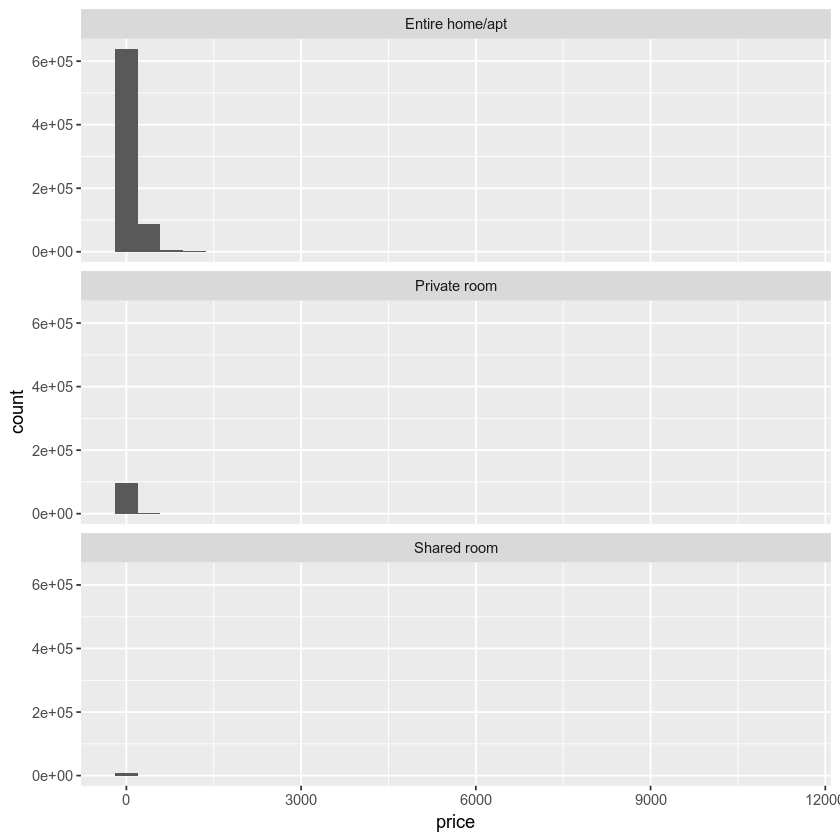

In [91]:
ggplot(filter(aggregated_paris_listings_df, !is.na(room_type))) +
    facet_wrap(~ room_type, ncol = 1) + 
    geom_histogram(aes(x = price))

There is an evident right skew on price. This normality can be formally tested.

In [99]:
for (room_type_str in unique(filter(aggregated_paris_listings_df, !is.na(room_type))$room_type)) {
    
    cat("Testing normality of price for", room_type_str)
    
    aggregated_paris_listings_df %>%
    filter(room_type == room_type_str) %>%
    pull(price) %>%
    nortest::ad.test() %>%
    print()

}

Testing normality of price for Private room
	Anderson-Darling normality test

data:  .
A = 9564.5, p-value < 2.2e-16

Testing normality of price for Entire home/apt
	Anderson-Darling normality test

data:  .
A = 78128, p-value < 2.2e-16

Testing normality of price for Shared room
	Anderson-Darling normality test

data:  .
A = 408.1, p-value < 2.2e-16



Evidently, the normlity assumption is invalid

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


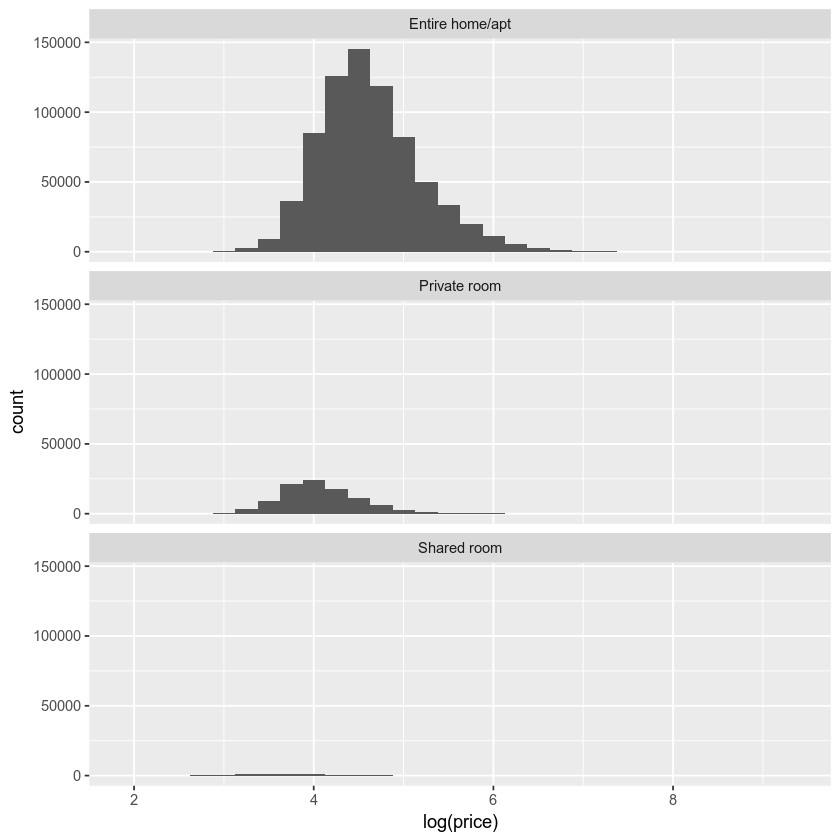

In [100]:
ggplot(filter(aggregated_paris_listings_df, !is.na(room_type))) +
    facet_wrap(~ room_type, ncol = 1) + 
    geom_histogram(aes(x = log(price)))

Log transform improves the situation. Next we wish to see if the groups have equal variance

In [106]:
model_price_room_type = lm(price ~ room_type, 
                           data = filter(aggregated_paris_listings_df, !is.na(room_type)))

In [107]:
type3anova::type3anova(model_price_room_type)

term,ss,df1,df2,f,pvalue
<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
(Intercept),353811037,1,837526,24851.41,0
room_type,311804622,2,837526,10950.46,0
Residuals,11923908709,837526,837526,NA,NA


This ANOVA indicates that price of rooms is different across room types

In [110]:
TukeyHSD(aov(price ~ room_type, 
             data = filter(aggregated_paris_listings_df, !is.na(room_type))))

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = price ~ room_type, data = filter(aggregated_paris_listings_df, !is.na(room_type)))

$room_type
                                  diff       lwr       upr p adj
Private room-Entire home/apt -56.42153 -57.36864 -55.47443     0
Shared room-Entire home/apt  -78.44677 -81.87502 -75.01852     0
Shared room-Private room     -22.02524 -25.55174 -18.49874     0


This indicates that prices across all the three room types is different

### 5.3. Price is driven by the overall satisfaction derived

Warning message:
“Removed 386800 rows containing non-finite values (stat_summary).”Warning message:
“Removed 386800 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 386800 rows containing missing values (geom_point).”

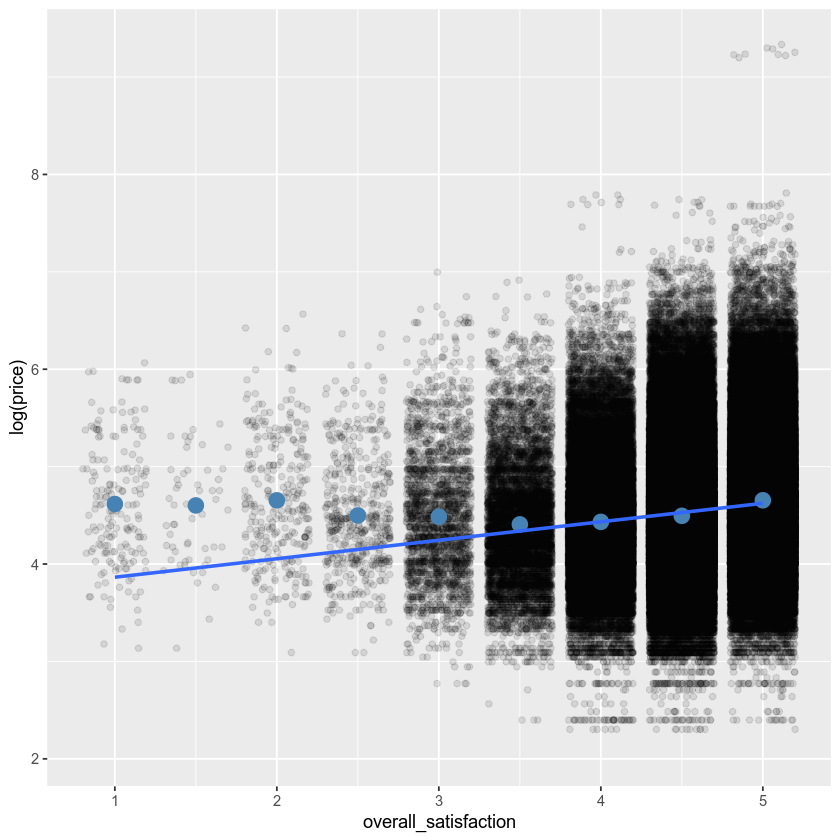

In [111]:
ggplot(filter(aggregated_paris_listings_df, !is.na(room_type)),
       aes(x = overall_satisfaction, y = log(price))) +
    geom_jitter(alpha = 1/10) +
    stat_summary(fun.y = mean,
                 color = 'steelblue',
                 geom = 'point',
                 size = 4) +
    stat_smooth(method = 'lm', se = FALSE) # add in the regression line

In [112]:
model_price_satisfaction = lm(price ~ overall_satisfaction,
                              data = filter(aggregated_paris_listings_df, !is.na(room_type)))

In [113]:
summary(model_price_satisfaction)


Call:
lm(formula = price ~ overall_satisfaction, data = filter(aggregated_paris_listings_df, 
    !is.na(room_type)))

Residuals:
    Min      1Q  Median      3Q     Max 
 -112.6   -49.3   -23.3    17.7 11200.4 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)            9.7462     1.7476   5.577 2.45e-08 ***
overall_satisfaction  22.5686     0.3773  59.820  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 100.3 on 450727 degrees of freedom
  (386800 observations deleted due to missingness)
Multiple R-squared:  0.007877,	Adjusted R-squared:  0.007875 
F-statistic:  3578 on 1 and 450727 DF,  p-value: < 2.2e-16


Very low R squared indicates that overall satisfaction does not explain the variation in price. We will need to look for other predictors

### 5.4. What drives prices of properties?

In [116]:
aggregated_paris_listings_df = filter(aggregated_paris_listings_df, !is.na(room_type))

In [127]:
aggregated_paris_listings_df %>%
    select(price, overall_satisfaction, reviews, accommodates) %>%
    drop_na() %>%
    summary()

     price         overall_satisfaction    reviews        accommodates   
 Min.   :   10.0   Min.   :1.000        Min.   :  0.00   Min.   : 0.000  
 1st Qu.:   65.0   1st Qu.:4.500        1st Qu.:  5.00   1st Qu.: 2.000  
 Median :   90.0   Median :4.500        Median : 10.00   Median : 2.000  
 Mean   :  112.2   Mean   :4.616        Mean   : 21.24   Mean   : 3.093  
 3rd Qu.:  130.0   3rd Qu.:5.000        3rd Qu.: 24.00   3rd Qu.: 4.000  
 Max.   :11323.0   Max.   :5.000        Max.   :529.00   Max.   :16.000  

In [123]:
aggregated_paris_listings_df %>%
    select(price, overall_satisfaction, reviews, accommodates) %>%
    drop_na() %>%
    cor()

,price,overall_satisfaction,reviews,accommodates
price,1.00000000,0.091617650,-0.027547857,0.511605341
overall_satisfaction,0.09161765,1.000000000,-0.003672570,-0.008214024
reviews,-0.02754786,-0.003672570,1.000000000,-0.008177055
accommodates,0.51160534,-0.008214024,-0.008177055,1.000000000


These seem to be nice features

In [137]:
lm(price ~ overall_satisfaction + reviews + accommodates,
   data = aggregated_paris_listings_df) %>%

    summary()


Call:
lm(formula = price ~ overall_satisfaction + reviews + accommodates, 
    data = aggregated_paris_listings_df)

Residuals:
    Min      1Q  Median      3Q     Max 
 -532.0   -34.6    -8.9    19.8 11033.6 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -1.023e+02  1.503e+00  -68.05   <2e-16 ***
overall_satisfaction  2.382e+01  3.183e-01   74.85   <2e-16 ***
reviews              -7.217e-02  4.012e-03  -17.99   <2e-16 ***
accommodates          3.428e+01  8.561e-02  400.45   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 83.88 on 445386 degrees of freedom
  (392139 observations deleted due to missingness)
Multiple R-squared:  0.2715,	Adjusted R-squared:  0.2714 
F-statistic: 5.532e+04 on 3 and 445386 DF,  p-value: < 2.2e-16


In [138]:
lm(log(price) ~ overall_satisfaction + reviews + accommodates,
   data = aggregated_paris_listings_df) %>%
    
    summary()


Call:
lm(formula = log(price) ~ overall_satisfaction + reviews + accommodates, 
    data = aggregated_paris_listings_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.1131 -0.2904 -0.0223  0.2697  4.4695 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           2.900e+00  7.907e-03 366.716  < 2e-16 ***
overall_satisfaction  2.007e-01  1.674e-03 119.878  < 2e-16 ***
reviews              -1.036e-04  2.111e-05  -4.907 9.24e-07 ***
accommodates          2.317e-01  4.504e-04 514.420  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4413 on 445386 degrees of freedom
  (392139 observations deleted due to missingness)
Multiple R-squared:  0.3844,	Adjusted R-squared:  0.3844 
F-statistic: 9.27e+04 on 3 and 445386 DF,  p-value: < 2.2e-16


In [139]:
lm(log(price) ~ overall_satisfaction * reviews,
   data = aggregated_paris_listings_df) %>% 
    
    summary()


Call:
lm(formula = log(price) ~ overall_satisfaction * reviews, data = aggregated_paris_listings_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.3095 -0.3809 -0.0476  0.3223  4.7000 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   3.912e+00  1.130e-02  346.12   <2e-16 ***
overall_satisfaction          1.391e-01  2.444e-03   56.92   <2e-16 ***
reviews                      -1.617e-02  3.841e-04  -42.10   <2e-16 ***
overall_satisfaction:reviews  3.470e-03  8.352e-05   41.55   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5636 on 450725 degrees of freedom
  (386800 observations deleted due to missingness)
Multiple R-squared:  0.02135,	Adjusted R-squared:  0.02134 
F-statistic:  3277 on 3 and 450725 DF,  p-value: < 2.2e-16


In [140]:
lm(log(price) ~ overall_satisfaction * reviews + accommodates,
   data = aggregated_paris_listings_df) %>% 
    
    summary()


Call:
lm(formula = log(price) ~ overall_satisfaction * reviews + accommodates, 
    data = aggregated_paris_listings_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.1003 -0.2893 -0.0211  0.2691  4.4786 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   3.151e+00  9.016e-03  349.51   <2e-16 ***
overall_satisfaction          1.456e-01  1.925e-03   75.68   <2e-16 ***
reviews                      -1.732e-02  3.010e-04  -57.56   <2e-16 ***
accommodates                  2.319e-01  4.487e-04  516.76   <2e-16 ***
overall_satisfaction:reviews  3.753e-03  6.544e-05   57.35   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4397 on 445385 degrees of freedom
  (392139 observations deleted due to missingness)
Multiple R-squared:  0.3889,	Adjusted R-squared:  0.3889 
F-statistic: 7.086e+04 on 4 and 445385 DF,  p-value: < 2.2e-16


In [141]:
lm(log(price) ~ overall_satisfaction * reviews * accommodates,
   data = aggregated_paris_listings_df) %>% 
    
    summary()


Call:
lm(formula = log(price) ~ overall_satisfaction * reviews * accommodates, 
    data = aggregated_paris_listings_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.2146 -0.2887 -0.0221  0.2697  4.4713 

Coefficients:
                                            Estimate Std. Error t value
(Intercept)                                3.118e+00  2.106e-02 148.056
overall_satisfaction                       1.462e-01  4.553e-03  32.102
reviews                                   -9.692e-03  7.041e-04 -13.766
accommodates                               2.436e-01  6.153e-03  39.595
overall_satisfaction:reviews               2.402e-03  1.533e-04  15.667
overall_satisfaction:accommodates         -2.866e-04  1.331e-03  -0.215
reviews:accommodates                      -2.501e-03  2.130e-04 -11.742
overall_satisfaction:reviews:accommodates  4.408e-04  4.646e-05   9.487
                                          Pr(>|t|)    
(Intercept)                                 <2e-16 ***
overall_sat

In [147]:
aggregated_paris_listings_df %>%
    filter(!is.na(overall_satisfaction)) %>%
    summarize(q1 = quantile(reviews, 0.33),
              q2 = quantile(reviews, 0.66),
              max = max(reviews))

q1,q2,max
<dbl>,<dbl>,<dbl>
6,17,529


In [149]:
aggregated_paris_listings_df %>%
    filter(!is.na(overall_satisfaction)) %>%
    mutate(review_group = case_when(reviews <= quantile(reviews, 0.33) ~ 'low',
                                    reviews <= quantile(reviews, 0.66) ~ 'medium',
                                    TRUE ~ 'high'),
          review_group = factor(review_group, levels = c("low","medium","high"))) ->
    aggregated_paris_reviews_df

In [151]:
aggregated_paris_reviews_df %>%
    group_by(review_group) %>%
    summarize(min = min(reviews),
              max = max(reviews))

review_group,min,max
<fct>,<dbl>,<dbl>
low,0,6
medium,7,17
high,18,529


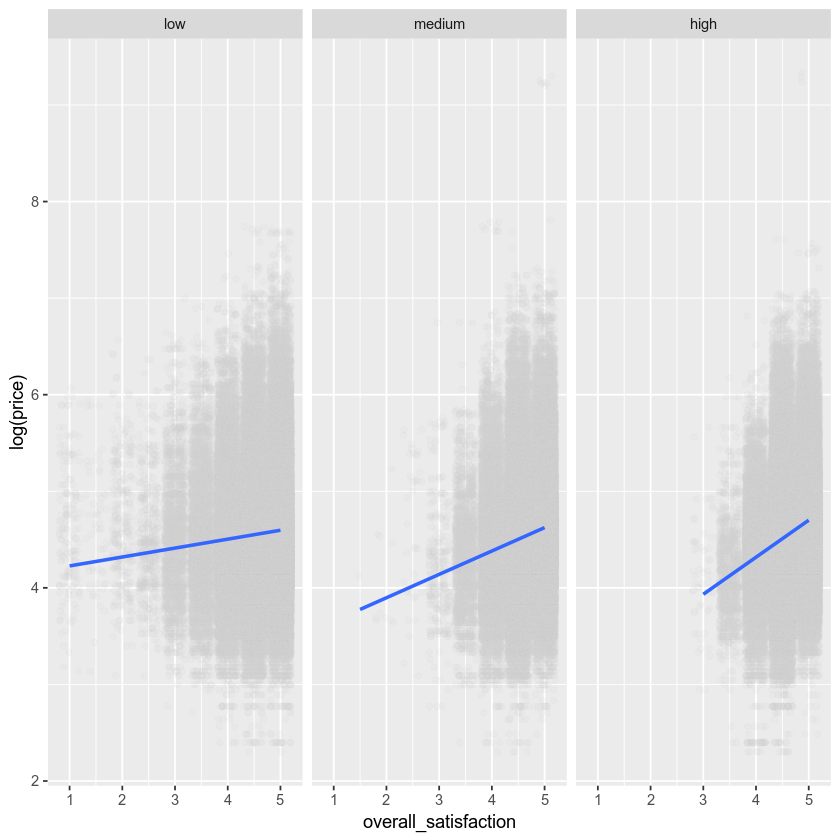

In [155]:
ggplot(aggregated_paris_reviews_df,
       aes(x = overall_satisfaction, y = log(price))) + 
    facet_wrap(~ review_group) +
    geom_jitter(color = 'lightgrey', alpha = 1/10) +
    stat_smooth(method = "lm", se= FALSE)